### Bevægelsesligninger

Den resulterende kraft på et objekt udsat for luftmodstand i et skråt kast er

$$\vec{F_{objekt}} = m \vec{g} - \alpha | \vec{v} |^2 \cdot  \hat{\vec{v}} = m \vec{g} - \alpha | \vec{v} | \cdot  \vec{v}$$

Vi ser at kraftligningerne langs x- og y-aksen er

$$\Sigma F_x = - \alpha | \vec{v} | \cdot v_x = m a_x$$

$$\Sigma F_y = - m g - \alpha | \vec{v} | \cdot  v_y = m a_y$$

Vi dividerer med $m$ og ser at accelerationen af objektet er givet ved

$$
\vec{a} = \frac{d\vec{v}}{dt} =
\begin{bmatrix}
a_x \\
a_y \\
\end{bmatrix}
=
\begin{bmatrix}
- \frac{\alpha}{m} | \vec{v} | \cdot  v_x \\
- g - \frac{\alpha}{m} | \vec{v} | \cdot  v_y \\
\end{bmatrix}
$$


$ \vec{a} $ ændrer sig hele tiden, men for tilpas korte tidsintervaller $\Delta t$ er den tilnærmelsesvis konstant og svarer til ændringen i hastigheden over et tidsintervallet. Dvs. at vi kan bruge ligningen

$$ \vec{a} = \frac{\Delta \vec{v}}{\Delta t} $$

$$ \rightarrow  \Delta \vec{v} = \vec{a} \cdot \Delta t $$

Med hensyn til ændringen i objektets position kan vi approksimere den som objektets gennemsnitshastighed over et bestemt tidsinterval ganget med tidsintervallets størrelse. Denne gennemsnitshastighed bliver

$$ \frac{(\vec{v} + (\vec{v} + \Delta \vec{v}))}{2} = \\
(\vec{v} + \frac{\Delta \vec{v}}{2})$$

Eftersom $\vec{v}$ er hastigheden i starten af tidsintervallet og $\vec{v} + \Delta \vec{v}$ er hastigheden i slutningen af tidsintervallet.

Altså må ændringen i positionen være givet ved

$$\Delta \vec{s} = (\vec{v} + \frac{\Delta \vec{v}}{2}) \cdot \Delta t $$

$$ = \vec{v} \cdot \Delta t + \frac{\Delta \vec{v} \cdot \Delta t}{2} $$

$$ = \vec{v} \cdot \Delta t + \frac{\vec{a} \cdot {\Delta t}^2}{2} $$

### Implementering

Nu er vi klar til at lave simulationen. Vi starter med nogle begyndelsesbetingelser og laver en løkke der løbende opdaterer objektets position og hastighed indtil det rammer jorden.

Vi kan lave alle de plots vores hjerte begærer *inde i funktionen*, så slipper vi for at skulle returnere en masse lister med data.

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Markdown as md, display_markdown

# Hjælpefunktion fordi jeg er doven og ikke gider skrive np.sqrt(bla bla) en million gange
def vectorlen(vector):
    return np.linalg.norm(vector)

# Tager s_0 som et array eller en tuple [x, y]
def simulate_throw(alpha, g, m, v_0, s_0, theta_0, Delta_t):
    # Startbetingelser
    t = 0
    s = np.array(s_0)
    v = v_0 * np.array([np.cos(theta_0), np.sin(theta_0)])
    a = np.array([0,0])

    # For at gemme objektets bevægelse i løbet af simulationen
    x_arr = []
    y_arr = []
    v_arr = []
    t_arr = []

    # Kør simulationen indtil objektet rammer jorden (indtil y <= 0)
    while (s[1] > 0):
        # Udregn t
        t += Delta_t

        # Udregn accelerationen
        a[0] = -(alpha/m)*vectorlen(v)*v[0]
        a[1] = -g -(alpha/m)*vectorlen(v)*v[1]

        # Udregn hastighedsændring
        v = v + a * Delta_t
        
        # Udregn positionsændring
        s = s + v * Delta_t + (a * Delta_t**2)/2

        # Gem position
        x_arr.append(s[0])
        y_arr.append(s[1])
        t_arr.append(t)
        v_arr.append(vectorlen(v))

    # Skudlængde
    l = x_arr[-1]

    # Plot objektets bevægelse
    plt.figure(1)
    plt.grid()
    plt.title("Plot over objektets bane")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.plot(x_arr, y_arr)
    plt.xlim(0, max(x_arr) + 0.5)
    plt.ylim(0, max(y_arr) + 0.5)

    # Returner skudlængden
    return l



Vi kører simulationen for $\theta = \frac{\pi}{4} $

Skudlængden for $\theta = \frac{\pi}{4} $ er 1.90133

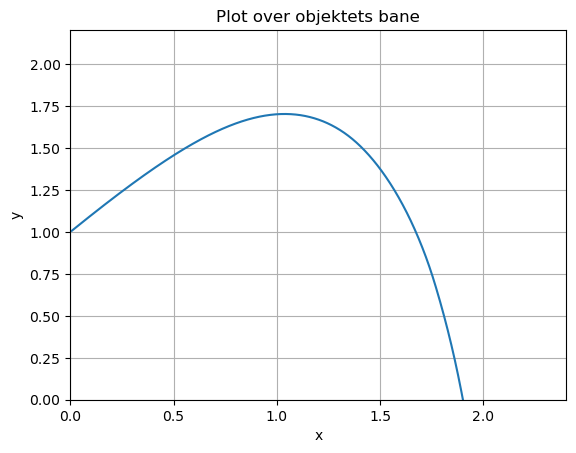

In [22]:
length = simulate_throw(alpha=0.1, g=10, m=0.1, v_0=10, s_0=[0, 1], theta_0=(np.pi/4), Delta_t=0.001)

display_markdown(md(r"Skudlængden for $\theta = \frac{{\pi}}{{4}} $ er {:.5f}".format(length)))


Nu er tiden kommet til at finde vinklen der fører til den størst mulige skudlængde. Vi får at vide at vi skal teste mindst 50 forskellige vinkler.

Vi laver en funktion der tager to vinkler og leder efter vinklen med størst skudlængde inden for det interval.

Funktionen starter med at se på skudlængden for 100 jævnt fordelte vinkler i intervallet, hvorefter den tager vinklen med størst skudlængde og gør det samme for intervallet udgjort af vinklen før og efter denne vinkel. Det bliver den ved med at gøre indtil vinklerne i intervallet ligger inden for en hvis afstand af hinanden, bestemt af "spacing"-parametren.

Nu kan vi få et meget nøjagtigt resultat ved at vælge små værdier for spacing (og $\Delta t$).

Vinklen med størst skudlængde er 0.39458 radianer med end skudlængde på 2.09387


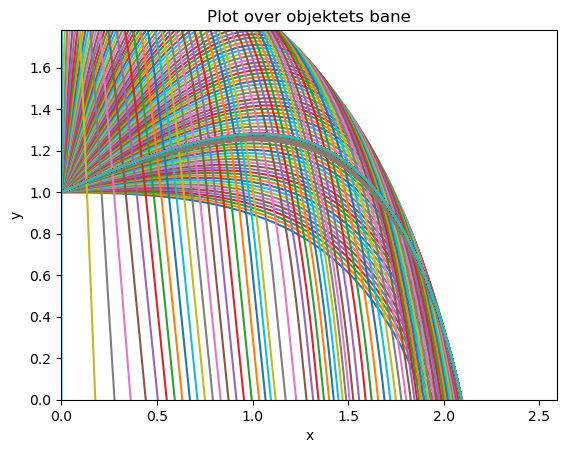

In [23]:
def findOptimalAngle(start, end, spacing, angle_Delta_t):
    # 100 jævnt fordelte vinkler i intervallet
    angles = np.linspace(start, end, 100)

    # Gemmer indeks og skudlængde for vinklen med størst skudlængde
    res = []

    for i in range(angles.size):
        # Nuværende skudlængde
        length = simulate_throw(alpha=0.1, g=10, m=0.1, v_0=10, s_0=[0, 1], theta_0=angles[i], Delta_t=angle_Delta_t)

        # Hvis det er den første vinkel vi tjekker gemmes den
        if len(res) == 0:
            res = [i, length]
        # Tekker vi om den nuværende vinkel giver en større skudlængde
        elif res[1] <= length:
            res = [i, length]

    # Returner vinklen hvis intervallet vi kigger på er småt nok
    if abs(start - end) <= spacing:
        return (angles[res[0]], res[1])
    
    # Her vælges det nye interval (v er vinklen med størst skudlængde i det gamle interval)

    # Hvis v er i enden af intervallet vi kiggede på
    # lader vi v være den nederste vinkel i det nye interval
    if res[0] == len(angles) - 1:
        start = angles[res[0] - 1]
        end = angles[res[0]]
    # I det omvendte tilfælde hvor v er den første vinkel i intervallet vi kiggede på
    # lader vi v være den øverste vinkel i det nye interval
    elif res[0] == 0:
        start = angles[res[0]]
        end = angles[res[0] + 1]
    # Ellers er det nye interval [v - 1, v + 1] hvor v - 1 og v + 1 er vinklerne før og efter v
    else:
        start = angles[res[0] - 1]
        end = angles[res[0] + 1]

    # Hvis vi intervallet ikke er småt nok endnu fortsætter vi søgningen
    return findOptimalAngle(start, end, spacing, angle_Delta_t)
        
# Kald funktionen med startintervallet 0° til 90°, lav spacing og Delta_t=0.001
optimal_angle, optimal_length = findOptimalAngle(start=0, end=np.pi/2, spacing=0.00001, angle_Delta_t=0.001)

print("Vinklen med størst skudlængde er {:.5f} radianer med end skudlængde på {:.5f}".format(optimal_angle, optimal_length))